In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import math
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os



## Figure 1

## Figure 2 

In [2]:
d = [3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40, 50]
# d = list(range(1, 15))
b = list(range(0, 256))  # All integers from 0 to 255
a = list(range(361))  # All integers from 0 to 360 
# empty list to store result of x
results = []

# loop over each combination of d, b, and a
for di in d:
    for bi in b:
        # find the value of x
        x = (math.sqrt((65536) / (bi + 1)) - 16) * (1/ di) 
        
        # Append the result to the list
        results.append([di, bi, x])

# Create a DataFrame to store the results
df = pd.DataFrame(results, columns=['d', 'b', 'x'])

# Convert 'd' column to categorical data type
df['d'] = df['d'].astype('str')


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/4004232844.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/4004232844.py:48: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)


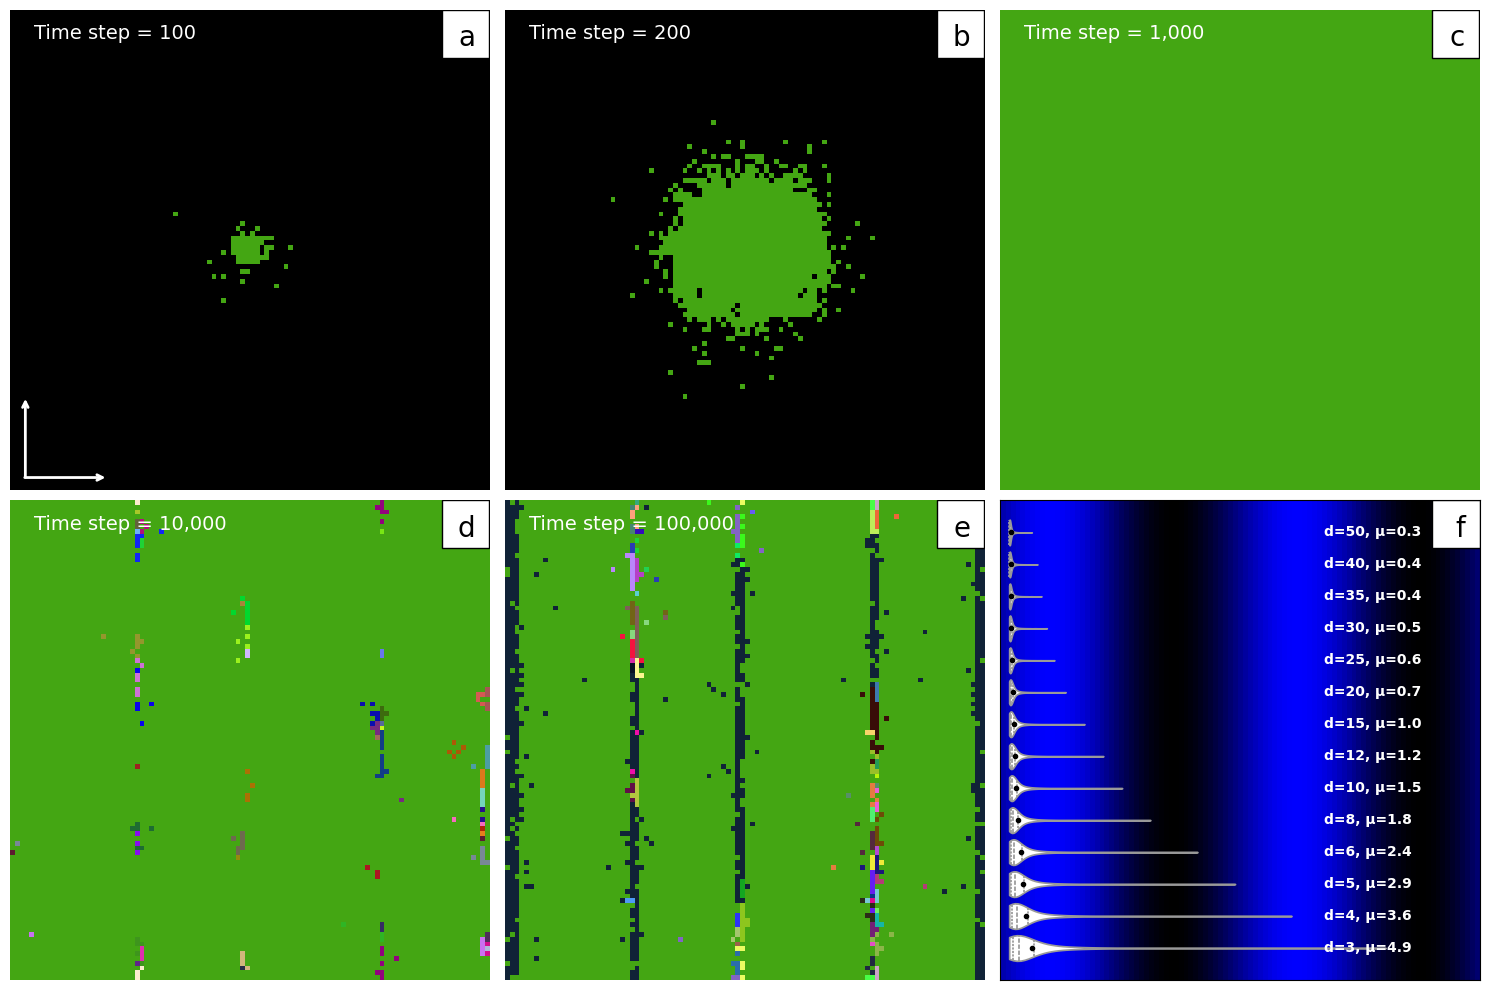

In [3]:
palette = ['white']

disps = df['d'].unique()  # Get unique categories in sorted order
timestep = ['100', '200', '1,000', '10,000', '100,000' ]

# Paths to the first 5 images
image_paths = [
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0000099.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0000199.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0000999.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0009999.png',
    '/Users/gb4818/Desktop/REvoSim_output/species/REvoSim_species_it_0099999.png'
]
# Path to the environment image
last_image_path = mpimg.imread('/Users/gb4818/Desktop/REvoSim_output/w50_0RG/w50_0RG.png')

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the images in the first five plots
for i in range(5):
    img = mpimg.imread(image_paths[i])
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')
    # Add letter and box around it
    ax.text(0.97, 0.97, chr(97 + i), transform=ax.transAxes, fontsize=20,  va='top', ha='right')
    ax.text(0.05, 0.97, f'Time step = {timestep[i]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='white')
    rect = patches.Rectangle((0.8999, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
    ax.add_patch(rect)
 
# ax = axes[0,2]   
# ax.text(0.05, 0.97, f'Time step = {timestep[2]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')
# ax = axes[1,0]   
# ax.text(0.05, 0.97, f'Time step = {timestep[3]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')
# ax = axes[1,1]   
# ax.text(0.05, 0.97, f'Time step = {timestep[4]}', transform=ax.transAxes, fontsize=14,  va='top', ha='left', color='black')

# Add arrows to the first plot
ax = axes[0, 0]
ax.annotate('', xy=(20, 97), xytext=(2, 97), arrowprops=dict( lw=2, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)
ax.annotate('', xy=(2.70, 80), xytext=(2.70, 97.5), arrowprops=dict(lw =2, facecolor='white', edgecolor='white', arrowstyle='->'), zorder=3)


# Plot the violin plot in the sixth plot
ax = axes[1, 2]
palette = ['white']
sns.violinplot(data=df, x='x', y='d', palette=palette, cut=0, inner="quartile", ax=ax)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_xlim(-2, 100)
ax.imshow(last_image_path, extent=[-5, 100, -1, (len(df['d'].unique()))], aspect='auto')
# Add letter and box around it
ax.text(0.97, 0.97, 'f', transform=ax.transAxes, fontsize=20,  va='top', ha='right')
rect = patches.Rectangle((0.8999, 0.9), 0.1, 0.1, linewidth=1, edgecolor='black', facecolor='white', transform=ax.transAxes)
ax.add_patch(rect)

for i, disp in enumerate(disps):
    # Calculate median and mean
    median_val = df[df['d'] == disp]['x'].median()
    mean_val = df[df['d'] == disp]['x'].mean()
    ax.plot(mean_val, i, 'o', color = "black", markersize=3, zorder=3)  # Plot mean point

    # Annotate the mean value using the μ symbol
    ax.text(mean_val + (67-mean_val), i, f'd={disp}, μ={mean_val:.1f}', verticalalignment='center', horizontalalignment='left', fontsize=10, color='White',  weight='bold')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Figure 3 

In [5]:
combined_df = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_15dp_iterations_species_richness.csv', index_col=0)      

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/1514493205.py:22: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


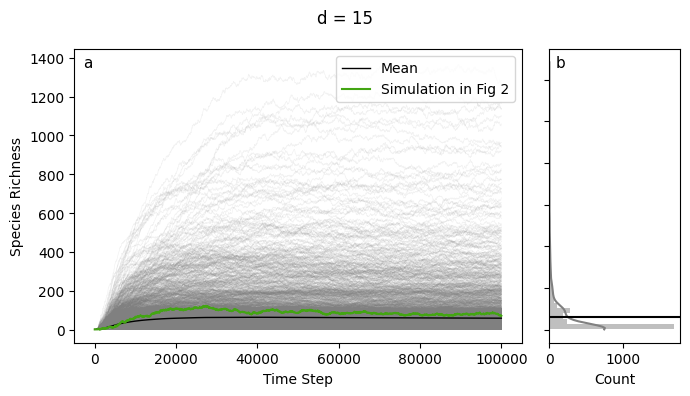

In [6]:
# Group the combined DataFrame by 'Environment'
grouped_df = combined_df.groupby('dp')

# Define the number of unique environments for coloring
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)
palette = ['gray']

#filder one dataframe ro get only one simylation and highlight that
one_sim = combined_df[combined_df['Simulation']== 'REvoSim_log_HL.txt']

# Plot for each environment
for i, (environment, data) in enumerate(grouped_df):
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"d = {environment}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=data, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = data.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')
    # Add an individual simulation highlighted
    sns.lineplot(data=one_sim, x='Iteration_Number', y='Species_Count', ax = ax_main,  legend=False, linewidth = 1.5, label= 'Simulation in Fig 2', color='#43A513')


    # Plot distribution at equilibrium
    data_hist = data[data['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    ax_yDist.annotate('b', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    # Set title and axis
    #ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Time Step")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

## Figure 4

In [7]:
# Combined transect file, contais all x and y position and their number of species
combined_transects = pd.read_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_15dp_grids_species_richness.csv', sep=',', index_col=0)
print(combined_transects.head())

# Get Blue values as read by Rivosim
colsin = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/100k_iter/w50_megabatch/combined_colsin_w50_15dp.csv', sep=',')
colsin = colsin.drop_duplicates(subset=['X coord', 'environment B value'])


   X coord  Y coord  Species Richness  \
0        0        0                 1   
1        1        0                 1   
2        2        0                 1   
3        3        0                 1   
4        4        0                 1   

                                        Simulation  dp  
0  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
1  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
2  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
3  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  
4  REvoSim_individuals_data_envw50_15dp_aj1974.txt  15  


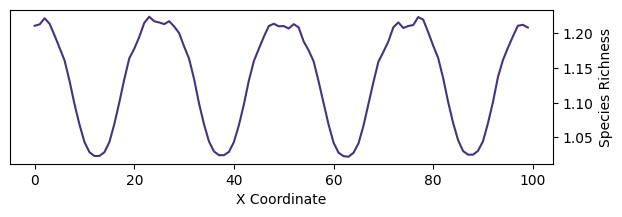

In [8]:
# Species Richness
plt.subplots(figsize = (7, 2))
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()


In [10]:
sims_means = combined_transects.groupby(['Simulation', 'X coord'])['Species Richness'].mean().reset_index()
print(sims_means.head())

# Get unique simulations and select 50 random simulations
unique_simulations = sims_means['Simulation'].unique()
random_simulations = pd.Series(unique_simulations).sample(n=200, replace=False)

# Filter sims_means based on random_simulations to extract only 50 simulations
sims_means_50 = sims_means[sims_means['Simulation'].isin(random_simulations)]
print(sims_means_50.head())

                        Simulation  X coord  Species Richness
0  REvoSim_individuals_data_HL.txt        0              1.36
1  REvoSim_individuals_data_HL.txt        1              1.27
2  REvoSim_individuals_data_HL.txt        2              1.28
3  REvoSim_individuals_data_HL.txt        3              1.32
4  REvoSim_individuals_data_HL.txt        4              1.31
                                           Simulation  X coord  \
2400  REvoSim_individuals_data_envw50_15dp_aj1019.txt        0   
2401  REvoSim_individuals_data_envw50_15dp_aj1019.txt        1   
2402  REvoSim_individuals_data_envw50_15dp_aj1019.txt        2   
2403  REvoSim_individuals_data_envw50_15dp_aj1019.txt        3   
2404  REvoSim_individuals_data_envw50_15dp_aj1019.txt        4   

      Species Richness  
2400              2.45  
2401              2.46  
2402              3.14  
2403              2.97  
2404              2.37  


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/341509606.py:2: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=sims_means, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, linewidth = 0.5, alpha = 0.1)


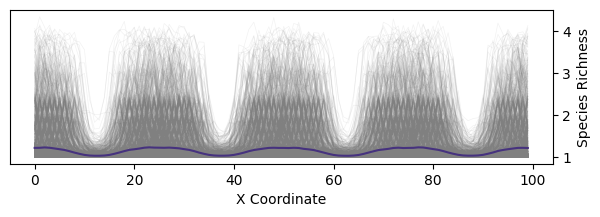

In [11]:

fig = plt.subplots(figsize = (7, 2))
sns.lineplot(data=sims_means, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, linewidth = 0.5, alpha = 0.1)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/2229920637.py:2: UserWarning: 
The palette list has fewer values (1) than needed (200) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=sims_means_50, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, alpha = 0.1, size=0.5)


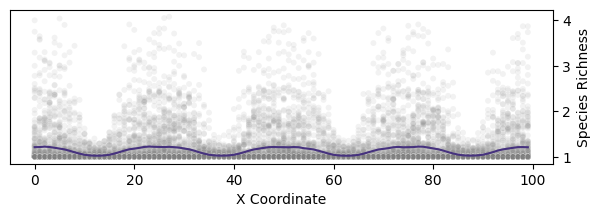

In [12]:
fig = plt.subplots(figsize = (7, 2))
sns.scatterplot(data=sims_means_50, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, alpha = 0.1, size=0.5)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/2980157878.py:2: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=sims_means, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, alpha = 0.1, s=5)


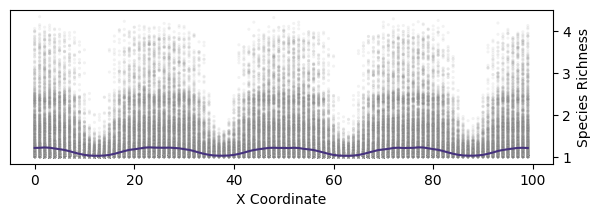

In [37]:
fig = plt.subplots(figsize = (7, 2))
sns.scatterplot(data=sims_means, x='X coord', y='Species Richness', hue = 'Simulation', palette=['gray'], legend=False, alpha = 0.1, s=5)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

   Y coord  X coord  Species Richness
0        0        0          1.204458
1        0        1          1.202717
2        0        2          1.218042
3        0        3          1.211425
4        0        4          1.198885


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_65709/568627979.py:5: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=transects_100, x='X coord', y='Species Richness', hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5,)


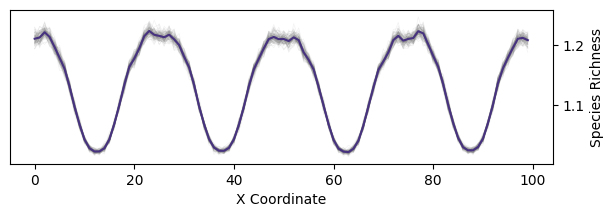

In [24]:
fig = plt.subplots(figsize = (7, 2))
transects_100 = combined_transects.groupby(["Y coord", 'X coord'])['Species Richness'].mean().reset_index()
print(transects_100.head())

sns.lineplot(data=transects_100, x='X coord', y='Species Richness', hue='Y coord', palette = palette, errorbar=None, legend=False, alpha=0.1, linewidth = 0.5,)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

In [15]:
sims_quantile95 = combined_transects.groupby('X coord')['Species Richness'].quantile(0.95).reset_index()
sims_quantile5 = combined_transects.groupby('X coord')['Species Richness'].quantile(0.05).reset_index()
sims_variance = combined_transects.groupby('X coord')['Species Richness'].var().reset_index()
print(sims_quantile95.head())
print(sims_quantile5.head())

   X coord  Species Richness
0        0               2.0
1        1               2.0
2        2               2.0
3        3               2.0
4        4               2.0
   X coord  Species Richness
0        0               1.0
1        1               1.0
2        2               1.0
3        3               1.0
4        4               1.0


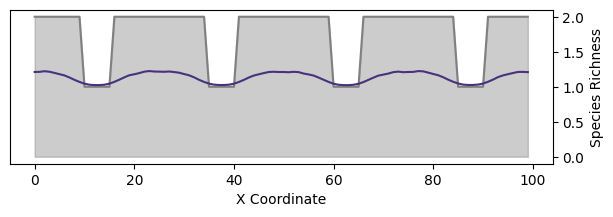

In [16]:
fig = plt.subplots(figsize = (7, 2))
sns.lineplot(data=sims_quantile95, x='X coord', y='Species Richness', color='gray', errorbar=None)
plt.fill_between(sims_quantile95['X coord'], sims_quantile95['Species Richness'], color='gray', alpha=0.4)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

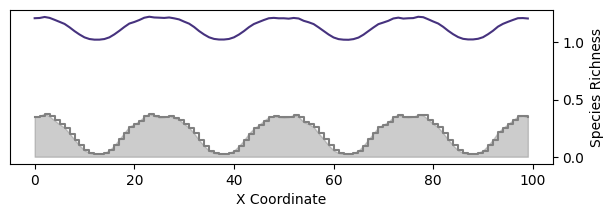

In [ ]:
fig = plt.subplots(figsize = (7, 2))
sns.lineplot(data=sims_variance, x='X coord', y='Species Richness', drawstyle='steps-post', color='gray')
plt.fill_between(sims_variance['X coord'], sims_variance['Species Richness'], color='gray', alpha=0.4)
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None)
plt.xlabel('X Coordinate')
#move to right side
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.show()

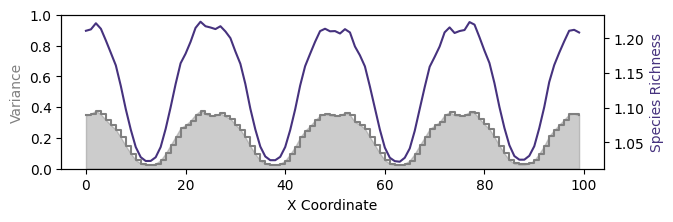

In [17]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(7, 2))

# Create a secondary y-axis for species richness
ax2 = ax1.twinx()

# Plot variance on left axis
sns.lineplot(data=sims_variance, x='X coord', y='Species Richness', drawstyle='steps-post', color='gray', ax=ax1)
ax1.fill_between(sims_variance['X coord'], sims_variance['Species Richness'], color='gray', alpha=0.4)

# Plot species richness on right axis
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None, ax=ax2)

# Set labels and titles
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Variance', color='gray')  # Set left y-axis label
ax2.set_ylabel('Species Richness', color=sns.color_palette('viridis')[0])  # Set right y-axis label

# Move y-axis label to the right
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax1.set_ylim(0,1)

plt.show()

In [ ]:
# Pivot the data to create an heatmap
pivot_mean = combined_transects.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
# Replace NaN values with 0
pivot_mean = pivot_mean.fillna(0)


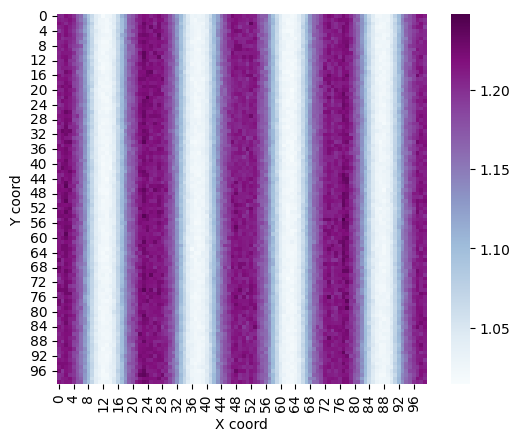

In [ ]:
# extract legend from average diversity heatmap
to_get_from = sns.heatmap(pivot_mean, cmap='BuPu', square=True)
# Extract color bar
# Get the colorbar from the heatmap
colorbar = to_get_from.collections[0].colorbar

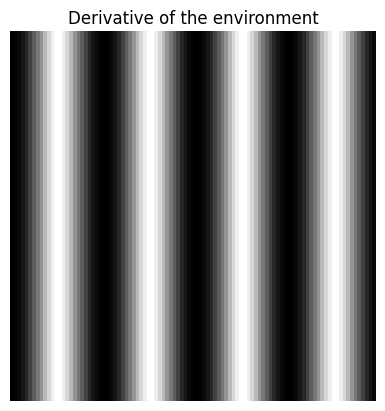

In [42]:
# Derivative of Environment
##### HEATMAP OF THE DERIVATIVE OF THE ENVIRONMENT FUNCTION
wavelength = 50  # define the variable that contains the wavelength
devsin = (255 * np.pi * abs(np.cos(2 * np.pi * (np.arange(0, 99, 1) / wavelength)))) / wavelength  # derivative of the environment function
# Create a DataFrame with 100 rows and 100 columns
pivot_dev = pd.DataFrame([devsin] * 100)

# heatmap
# Plot the additional heatmap in the third subplot (right side)
sns.heatmap(pivot_dev, cmap='Greys', cbar=False, square=True) 
plt.axis('off')
plt.title(f'Derivative of the environment') 
plt.show()

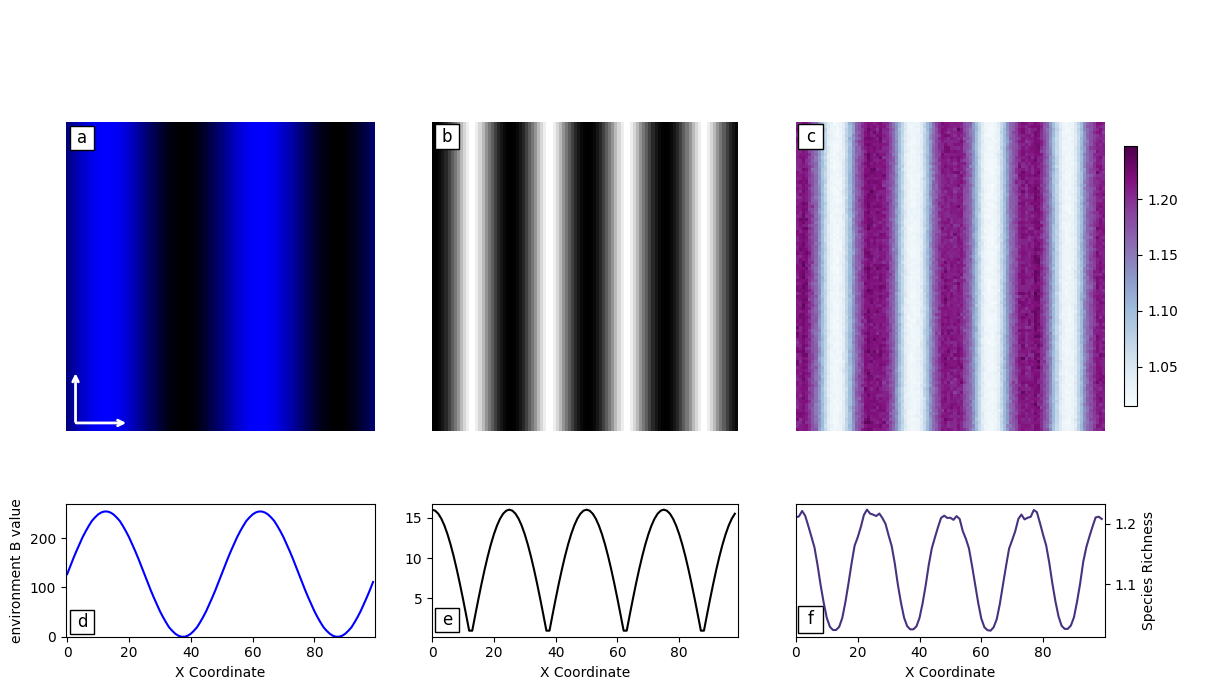

In [ ]:
######################
### PANEL CREATION ###
######################
# Load the image to get its dimensions
img = mpimg.imread('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/environments/w50/w50_0RG.png')


# Create a figure
fig = plt.figure(figsize=(12, 7))
# Create a grid layout
GridSpec = gridspec.GridSpec(ncols=4, nrows=1, figure= fig, width_ratios=[1, 0.99, 1, 0.28], wspace=0.01, hspace=0.02, top=0.0, bottom=0.05, left=0.17, right=0.1)

# Set the x-axis tick positions and labels
x_ticks = [0, 20, 40, 60, 80]  # Define the positions of the ticks
x_tick_labels = ['0', '20', '40', '60', '80']  # Define the labels for the ticks

####### SUBFIGURE ONE, TAKING THE FIRST COLOUMN
subfig1 = fig.add_subfigure(GridSpec[:, 0] )
# adding 2 plots for the suplots
subplots1 = subfig1.subplots(nrows=2, ncols=1, height_ratios=[4, 1], sharex=True)
# plot 1 -upper
subplots1[0].imshow(img)
subplots1[0].axis('off')
#subplots1[0].text(0.5, 1.03, 'Environment (w=50)', horizontalalignment='center', verticalalignment='bottom', transform=subplots1[0].transAxes, fontsize=14)
# annotate two axes
subplots1[0].annotate('', xy=(20, 97), xytext=(2, 97), arrowprops=dict(facecolor='white', arrowstyle='->', edgecolor='white', lw=2), zorder=3)
subplots1[0].annotate('', xy=(2.70, 80), xytext=(2.70, 97.5), arrowprops=dict(facecolor='white', arrowstyle='->', edgecolor='white', lw=2), zorder=3)
# plot 1 -lower
sns.lineplot(data=colsin, x='X coord', y='environment B value', color="blue", ax=subplots1[1])
subplots1[1].set_ylim(0, 270)
subplots1[1].set_xlabel('X Coordinate')

plt.tight_layout()


####### SUBFIGURE TWO, TAKING THE CENTRAL COLOUMN
subfig2 = fig.add_subfigure(GridSpec[:, 1])
# adding 2 plots for the suplots
subplots2 = subfig2.subplots(nrows=2, ncols=1, height_ratios=[4, 1], sharex=True)
# plot 2 -Upper
sns.heatmap(pivot_dev, cmap='Greys', ax=subplots2[0], cbar=False, square=True)
subplots2[0].axis('off')
#subplots2[0].text(0.5, 1.03, 'Derivative (abs)', horizontalalignment='center', verticalalignment='bottom', transform=subplots2[0].transAxes, fontsize=14)
# plot 2 - Lower
subplots2[1].plot(list(range(0, 99)), devsin, color="black")
# subplots2[1].set_ylim(0, 270)
# subplots2[1].set_yticks([])
subplots2[1].set_xlabel('X Coordinate')
subplots2[1].set_xticks(x_ticks)
subplots2[1].set_xticklabels(x_tick_labels)



####### SUBFIGURE THREE, TAKING THE RIGHT COLOUMN
subfig3 = fig.add_subfigure(GridSpec[:, 2])
# adding 2 plots for the suplots
subplots3 = subfig3.subplots(nrows=2, ncols=1, height_ratios=[4, 1], sharex=True)
# plot 3 - Upper
sns.heatmap(pivot_mean, cmap='BuPu', ax=subplots3[0], square=True, cbar=False)
subplots3[0].axis('off')
#subplots3[0].text(0.5, 1.03, 'Average Species Richness', horizontalalignment='center', verticalalignment='bottom', transform=subplots3[0].transAxes, fontsize=14)
# plot 3 - Lower
sns.lineplot(data=combined_transects, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], ax=subplots3[1], errorbar=None)
subplots3[1].set_xlabel('X Coordinate')
subplots3[1].yaxis.tick_right()
subplots3[1].yaxis.set_label_position("right")
subplots3[1].set_xticks(x_ticks)
subplots3[1].set_xticklabels(x_tick_labels)
####### SUBFIGURE FOUR, LEGEND COLOUMN
subfig4 = fig.add_subfigure(GridSpec[:, 3])
subplots4 = subfig4.subplots(nrows=2, ncols=1, height_ratios=[4, 1])
subplots4[0].axis('off')
cb = plt.colorbar(to_get_from.get_children()[0], ax=subplots4[0], label=colorbar.ax.yaxis.label.get_text(), pad=0.5, location='left')
# Set the ticks on the right side
cb.ax.yaxis.set_ticks_position('right')
subplots4[1].axis('off')


# Define the positions and sizes of the rectangles
rectangle_positions = [(0.8, 0.8), (0.8, 0.8), (0.8, 0.8)]  # Adjust these values as needed
rectangle_sizes = [(8, 8), (8, 8), (8, 8)]  # Adjust these values as needed

# Define the letters for each rectangle
letters = ['a', 'b', 'c']

# Loop through subplots to add rectangles
for i, subplot in enumerate([subplots1[0], subplots2[0], subplots3[0]] ):
    position = rectangle_positions[i]
    size = rectangle_sizes[i]
    letter = letters[i]

    # Create a rectangle patch
    rect = patches.Rectangle(position, size[0], size[1], linewidth=1, edgecolor='black', facecolor='w')

    # Add the rectangle patch to the subplot
    subplot.add_patch(rect)

    # Add the letter inside the rectangle
    subplot.text(position[0] + size[0] / 2, position[1] + size[1] / 2, letter, ha='center', va='center', fontsize=12, color='black')

# Add letters to the bottom plots
# Define the positions and sizes of the rectangles
rectangle_positions = [(0.8, 6), (0.8, 0.8), (0.8, 1.019)]  # Adjust these values as needed
rectangle_sizes = [(8, 48), (8, 3), (8, 0.045)]  # Adjust these values as needed

# Define the letters for each rectangle
letters = ['d', 'e', 'f']

# Loop through subplots to add rectangles
for i, subplot in enumerate([subplots1[1], subplots2[1], subplots3[1]] ):
    position = rectangle_positions[i]
    size = rectangle_sizes[i]
    letter = letters[i]

    # Create a rectangle patch
    rect = patches.Rectangle(position, size[0], size[1], linewidth=1, edgecolor='black', facecolor='w')

    # Add the rectangle patch to the subplot
    subplot.add_patch(rect)

    # Add the letter inside the rectangle
    subplot.text(position[0] + size[0] / 2, position[1] + size[1] / 2, letter, ha='center', va='center', fontsize=12, color='black')

# plt.savefig("/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-4-to-edit.svg", format='svg', dpi=150)



## Figure 5 

In [38]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_grids_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversity.csv', 'w50_40dp_genetic_diversity.csv', 'w50_

In [39]:
# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as 'grid_{dp}'")


File 'w50_20dp_grids_species_richness.csv' imported as 'grid_20dp'
File 'w50_35dp_grids_species_richness.csv' imported as 'grid_35dp'
File 'w50_3dp_grids_species_richness.csv' imported as 'grid_3dp'
File 'w50_50dp_grids_species_richness.csv' imported as 'grid_50dp'
File 'w50_25dp_grids_species_richness.csv' imported as 'grid_25dp'
File 'w50_30dp_grids_species_richness.csv' imported as 'grid_30dp'
File 'w50_40dp_grids_species_richness.csv' imported as 'grid_40dp'
File 'w50_8dp_grids_species_richness.csv' imported as 'grid_8dp'
File 'w50_6dp_grids_species_richness.csv' imported as 'grid_6dp'
File 'w50_4dp_grids_species_richness.csv' imported as 'grid_4dp'
File 'w50_15dp_grids_species_richness.csv' imported as 'grid_15dp'
File 'w50_10dp_grids_species_richness.csv' imported as 'grid_10dp'


In [40]:
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

['20dp', '35dp', '3dp', '50dp', '25dp', '30dp', '40dp', '8dp', '6dp', '4dp', '15dp', '10dp']
[20, 35, 3, 50, 25, 30, 40, 8, 6, 4, 15, 10]


In [ ]:
# Sort the dictionary items by keys (dp integers)
dfs_int_keys = dict(sorted(dfs_int_keys.items()))

# Calculate the number of rows and columns for subplots
num_grids = len(dfs_int_keys)
num_cols = 3
num_rows = (num_grids + num_cols - 1) // num_cols

# Calculate the figure size based on the desired proportion
fig_width = 7 * num_cols
fig_height = 2 * num_rows

# Create a figure and axes for subplots with the calculated size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True)

# Plotting
for idx, (dp, df) in enumerate(dfs_int_keys.items()):
    # Calculate the row and column index for the current grid
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Plot the species richness for the current grid
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.lineplot(data=df, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None, ax=ax)
    ax.text(0.05, 0.97, f'd={dp}', fontsize=14,  va='top', ha='left', color='white')
    ax.set_xlabel('X Coordinate')
    # Move y-axis ticks to the right side
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    
    # Add an additional axis for the second plot
    ax2 = ax.twinx()
    ax2.plot(list(range(0, 99)), devsin, color="black")
    ax2.set_ylabel('Derivative Env')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


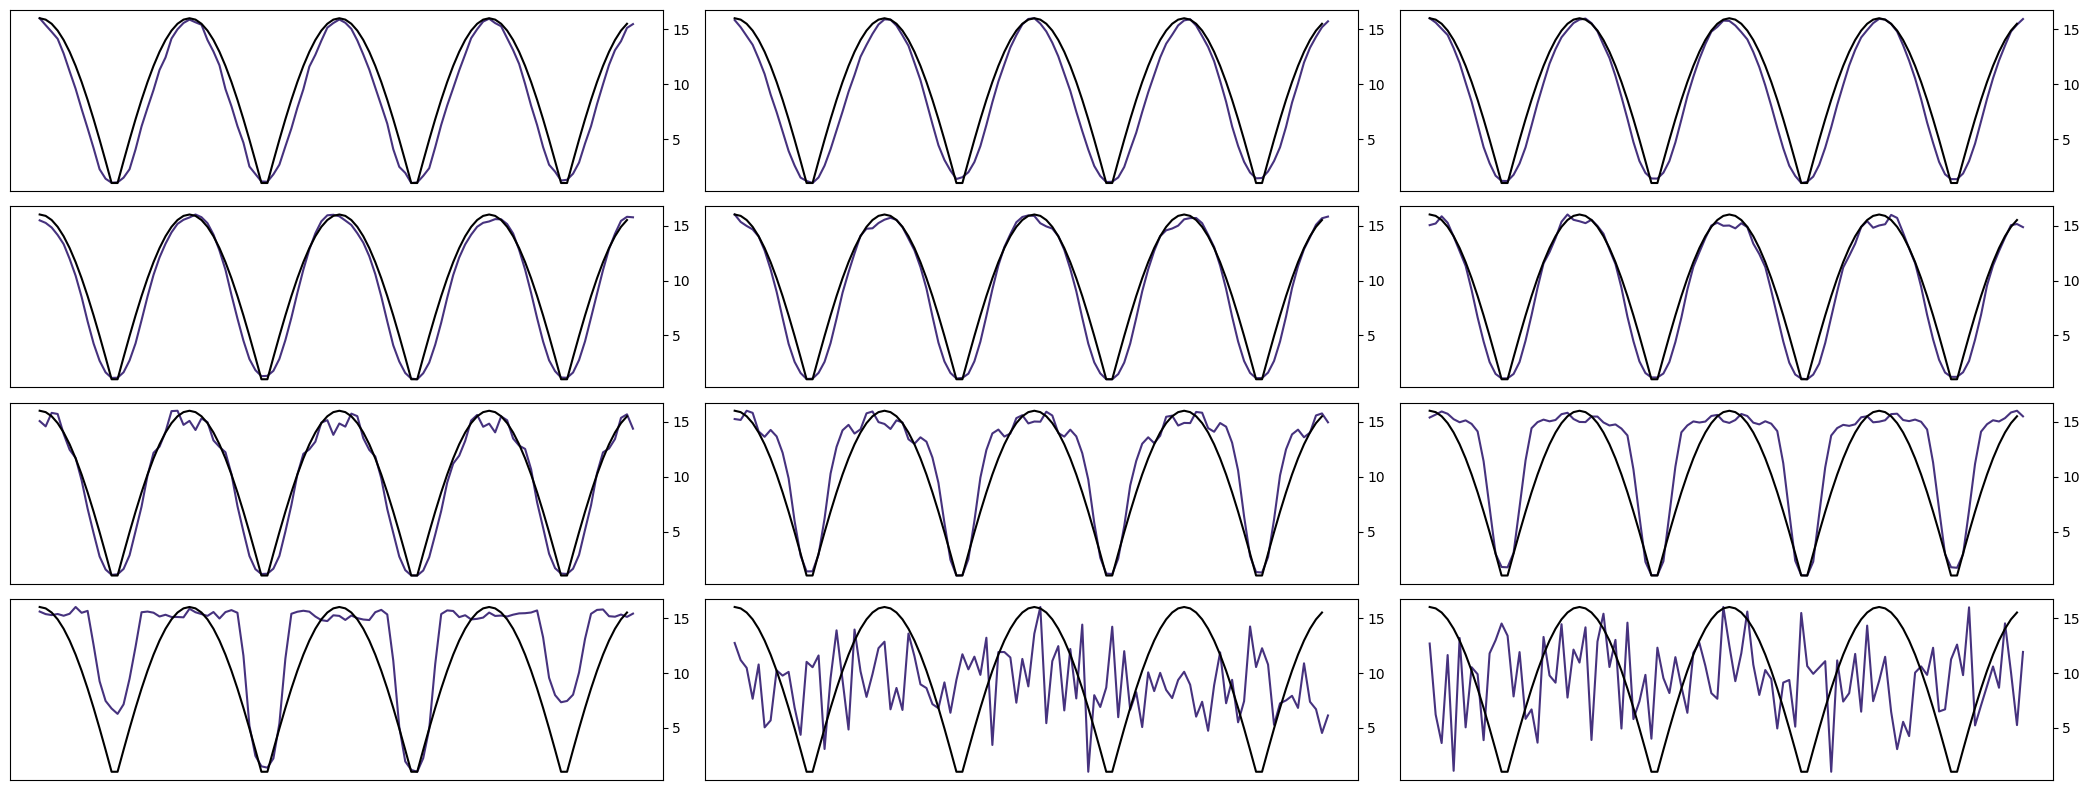

In [47]:
# Calculate the number of rows and columns for subplots
num_grids = len(dfs_int_keys)
num_cols = 3
num_rows = (num_grids + num_cols - 1) // num_cols

# Calculate the figure size based on the desired proportion
fig_width = 7 * num_cols
fig_height = 2 * num_rows

# Create a figure and axes for subplots with the calculated size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), sharex=True)

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plotting
for idx, (dp, df) in enumerate(dfs_int_keys.items()):
    # Calculate the row and column index for the current grid
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Plot the species richness for the current grid
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.lineplot(data=df, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None, ax=ax)
    # ax.text(0, 0, f'd={dp}', fontsize=11,  va='top', ha='left', color='black')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Add an additional axis for the second plot
    ax2 = ax.twinx()
    ax2.plot(list(range(0, 99)), devsin, color="black")
    ax2.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

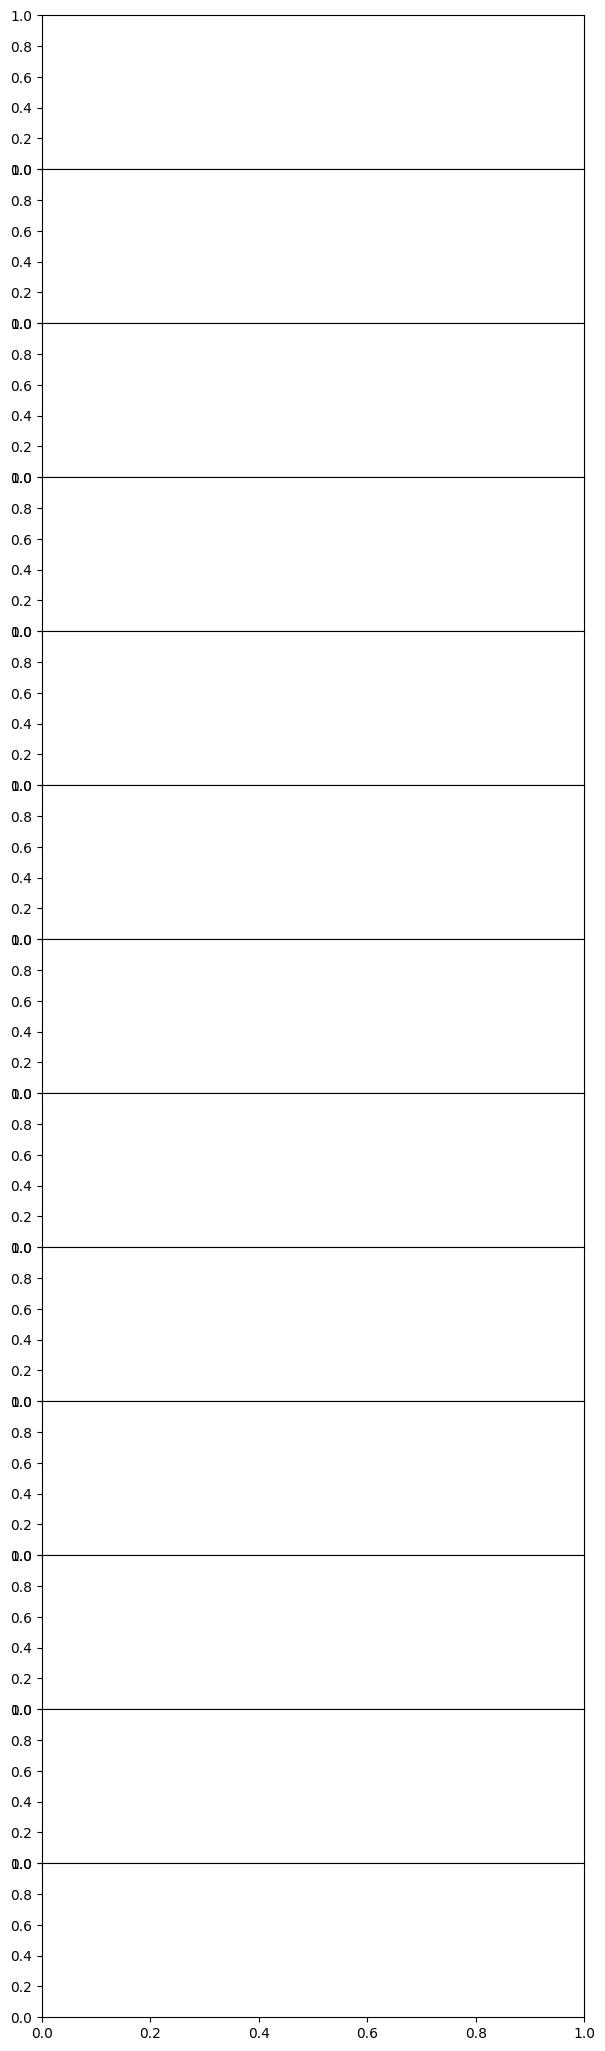

In [48]:
# Calculate the number of rows and columns for subplots
num_cols = 1
num_rows = 13

# Calculate the figure size based on the desired proportion
# fig_width = 7 * num_cols
# fig_height = 2 * num_rows

# Create a figure and axes for subplots with the calculated size
fig, axes = plt.subplots(13, 1, figsize=(7, 2*13), sharex=True)

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plotting
for idx, (dp, df) in enumerate(dfs_int_keys.items()):
    # Calculate the row and column index for the current grid
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Plot the species richness for the current grid
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sns.lineplot(data=df, x='X coord', y='Species Richness', color=sns.color_palette('viridis')[0], errorbar=None, ax=ax)
    ax.text(1, 1, f'd={dp}', fontsize=11,  va='top', ha='left', color='black')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Species Richness')
    # Add an additional axis for the second plot
    ax2 = ax.twinx()
    ax2.plot(list(range(0, 99)), devsin, color="black")
    ax2.set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Figure 6

## Figure 7